In [1]:
import matplotlib.pyplot as plt
import simulated_parameter_vault
import simulated_pulse_sequence

In [2]:
%%time
simulated_pulse_sequence.initialize_julia()

Successfully initialized Julia and IonSim.jl
Wall time: 1min 8s


# Single-ion Rabi flopping

In [3]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 1)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "pmt")

In [4]:
%%time
rabi_result = simulated_pulse_sequence.run_simulation(
    "sequences/rabi_flopping.py",
    "RabiFlopping",
    {
        "RabiFlopping-Scan_Selection": "RabiFlopping.duration",
        "RabiFlopping:RabiFlopping.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 10e-6,
            "npoints": 50
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-22\RabiFlopping\1103_45_results_RabiFlopping.txt
Wall time: 26.8 s


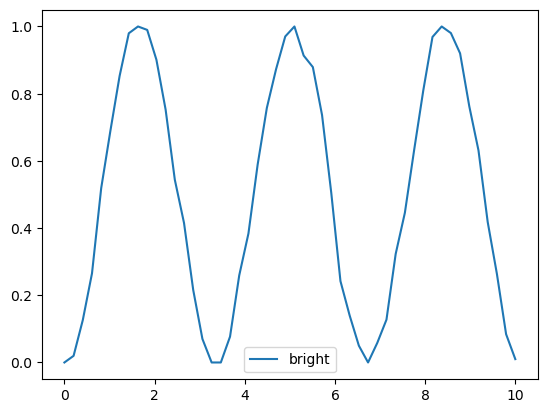

In [5]:
x = rabi_result['RabiFlopping']['x'] * 1e6
y = rabi_result['RabiFlopping']['y'][0]

plt.plot(x, y, label='bright')
plt.legend()
plt.show()

In [6]:
print(rabi_result)

{'RabiFlopping': {'x': array([0.00000000e+00, 2.04081633e-07, 4.08163265e-07, 6.12244898e-07,
       8.16326531e-07, 1.02040816e-06, 1.22448980e-06, 1.42857143e-06,
       1.63265306e-06, 1.83673469e-06, 2.04081633e-06, 2.24489796e-06,
       2.44897959e-06, 2.65306122e-06, 2.85714286e-06, 3.06122449e-06,
       3.26530612e-06, 3.46938776e-06, 3.67346939e-06, 3.87755102e-06,
       4.08163265e-06, 4.28571429e-06, 4.48979592e-06, 4.69387755e-06,
       4.89795918e-06, 5.10204082e-06, 5.30612245e-06, 5.51020408e-06,
       5.71428571e-06, 5.91836735e-06, 6.12244898e-06, 6.32653061e-06,
       6.53061224e-06, 6.73469388e-06, 6.93877551e-06, 7.14285714e-06,
       7.34693878e-06, 7.55102041e-06, 7.75510204e-06, 7.95918367e-06,
       8.16326531e-06, 8.36734694e-06, 8.57142857e-06, 8.77551020e-06,
       8.97959184e-06, 9.18367347e-06, 9.38775510e-06, 9.59183673e-06,
       9.79591837e-06, 1.00000000e-05]), 'y': [array([0.        , 0.01980198, 0.12621359, 0.26530612, 0.51886792,
       0.68

# Two-ion MS gate

In [7]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 2)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "camera_states")

simulated_parameter_vault.set_parameter(["MolmerSorensen", "bichro_enable"], True)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning"], -7e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning_carrier_1"], 1e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "amplitude"], 0.01)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "amp_blue"], 1.0)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "amp_red"], 1.0)

## Duration scan

In [8]:
%%time
ms_result = simulated_pulse_sequence.run_simulation(
    "sequences/molmer_sorensen.py",
    "MolmerSorensenGate",
    {
        "MolmerSorensen-Scan_Selection": "MolmerSorensen.duration",
        "MolmerSorensen:MolmerSorensen.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 300e-6,
            "npoints": 30
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-22\MolmerSorensenGate\1104_12_results_MolmerSorensen.txt
Wall time: 10.3 s


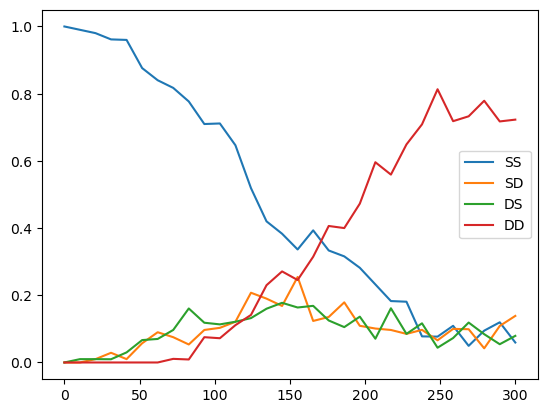

In [9]:
x = ms_result['MolmerSorensen']['x'] * 1e6
ds = ms_result['MolmerSorensen']['y'][0]
ss = ms_result['MolmerSorensen']['y'][1]
sd = ms_result['MolmerSorensen']['y'][2]
dd = ms_result['MolmerSorensen']['y'][3]

plt.plot(x, ss, label='SS')
plt.plot(x, sd, label='SD')
plt.plot(x, ds, label='DS')
plt.plot(x, dd, label='DD')
plt.legend()
plt.show()

In [10]:
print(ms_result)

{'RabiFlopping': {'x': [], 'y': []}, 'MolmerSorensen': {'x': array([0.00000000e+00, 1.03448276e-05, 2.06896552e-05, 3.10344828e-05,
       4.13793103e-05, 5.17241379e-05, 6.20689655e-05, 7.24137931e-05,
       8.27586207e-05, 9.31034483e-05, 1.03448276e-04, 1.13793103e-04,
       1.24137931e-04, 1.34482759e-04, 1.44827586e-04, 1.55172414e-04,
       1.65517241e-04, 1.75862069e-04, 1.86206897e-04, 1.96551724e-04,
       2.06896552e-04, 2.17241379e-04, 2.27586207e-04, 2.37931034e-04,
       2.48275862e-04, 2.58620690e-04, 2.68965517e-04, 2.79310345e-04,
       2.89655172e-04, 3.00000000e-04]), 'y': [array([0.        , 0.00990099, 0.00990099, 0.00961538, 0.03      ,
       0.06666667, 0.07      , 0.09677419, 0.16071429, 0.11827957,
       0.11340206, 0.12121212, 0.13207547, 0.16      , 0.17757009,
       0.16363636, 0.16853933, 0.125     , 0.10526316, 0.13636364,
       0.07070707, 0.16129032, 0.08510638, 0.11650485, 0.04395604,
       0.07272727, 0.11881188, 0.08421053, 0.05434783, 0.079

## Sit at the gate time and scan a different parameter

In [11]:
simulated_parameter_vault.set_parameter(["MolmerSorensen", "duration"], 150e-6)

In [12]:
%%time
ms_result = simulated_pulse_sequence.run_simulation(
    "sequences/molmer_sorensen.py",
    "MolmerSorensenGate",
    {
        "MolmerSorensen-Scan_Selection": "MolmerSorensen.detuning_carrier_1",
        "MolmerSorensen:MolmerSorensen.detuning_carrier_1": {
            "ty": "RangeScan",
            "start": -10e3,
            "stop": 10e3,
            "npoints": 20
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-22\MolmerSorensenGate\1104_23_results_MolmerSorensen.txt
Wall time: 6.67 s


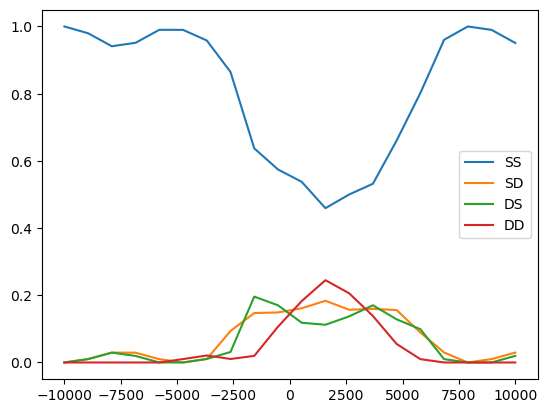

In [13]:
x = ms_result['MolmerSorensen']['x']
ds = ms_result['MolmerSorensen']['y'][0]
ss = ms_result['MolmerSorensen']['y'][1]
sd = ms_result['MolmerSorensen']['y'][2]
dd = ms_result['MolmerSorensen']['y'][3]

plt.plot(x, ss, label='SS')
plt.plot(x, sd, label='SD')
plt.plot(x, ds, label='DS')
plt.plot(x, dd, label='DD')
plt.legend()
plt.show()

In [14]:
print(ms_result)

{'RabiFlopping': {'x': [], 'y': []}, 'MolmerSorensen': {'x': array([-10000.        ,  -8947.36842105,  -7894.73684211,  -6842.10526316,
        -5789.47368421,  -4736.84210526,  -3684.21052632,  -2631.57894737,
        -1578.94736842,   -526.31578947,    526.31578947,   1578.94736842,
         2631.57894737,   3684.21052632,   4736.84210526,   5789.47368421,
         6842.10526316,   7894.73684211,   8947.36842105,  10000.        ]), 'y': [array([0.        , 0.01010101, 0.02941176, 0.01941748, 0.        ,
       0.        , 0.01041667, 0.03125   , 0.19607843, 0.17021277,
       0.11827957, 0.1122449 , 0.1372549 , 0.17021277, 0.12844037,
       0.0990099 , 0.00990099, 0.        , 0.        , 0.01960784]), array([1.        , 0.97979798, 0.94117647, 0.95145631, 0.99009901,
       0.98989899, 0.95833333, 0.86458333, 0.6372549 , 0.57446809,
       0.53763441, 0.45918367, 0.5       , 0.53191489, 0.66055046,
       0.8019802 , 0.96039604, 1.        , 0.98989899, 0.95098039]), array([0.       